<h1> Housing prices in Boston MA </h1>
Used dataset http://lib.stat.cmu.edu/datasets/boston to answer following questions: <br> -Is there a significant difference in the median value of houses bounded by the Charles river or not? <br> -Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940? <br> -Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town? <br> -What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes? <br>
<h6>Used regression OLS statistical model and Pyhton libraries: Pandas, Seaborn, Matplotlib, Statsmodels, Scipy.</h6>

import Pandas, Seaborn, Matplotlib, Statsmodels, Scipy and housing prices in Boston dataset

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

<h2> Initial tasks of the project </h2>

<h3> Median value of owner-occupied homes </h3>

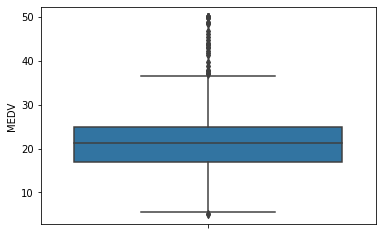

In [10]:
ax = sns.boxplot(y = 'MEDV', data = boston_df)

Boxplot above is for "Median value of owner-occupied homes". It shows the interquartile range (IQR) as a blue rectangle, which is the range between 25th and 75th percintile of data. Q2 is in the middle of IQR. "Max" and "min" values are shown as the horisontal lines above and below the IQR and calculated as follows: max = Q3 + 1.5*IQR, min = Q1 - 1.5*IQR. All values outside of max and min are considered as outliers.

<h3> Charles river variable </h3>

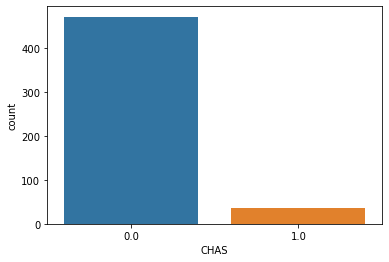

In [11]:
ax = sns.countplot(x = 'CHAS', data = boston_df)

Histogram above shows that there much less houses, which bounds Charles river (orange box) than not bounds.

<h3> Median value of owner-occupied homes vs. age group </h3>

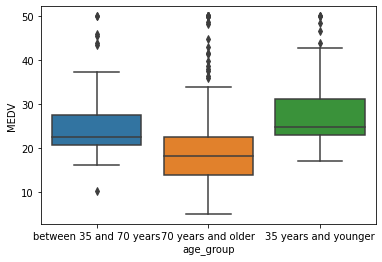

In [12]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
ax = sns.boxplot(y = 'MEDV', x = 'age_group', data = boston_df)

Boxplots above are for "Median value of owner-occupied homes", age was discretized into three groups: '35 years and younger', 'between 35 and 70 years' and '70 years and older'. Each boxplot shows the interquartile range (IQR) as a rectangle, which is the range between 25th and 75th percintile of data. Q2 is inside the middle of IQR and shows mean on the dataset. "Max" and "min" values are shown as the horisontal lines above and below the IQR and calculated as follows: max = Q3 + 1.5IQR, min = Q1 - 1.5IQR. All values outside of max and min are considered as outliers.

<h3> Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town </h3>

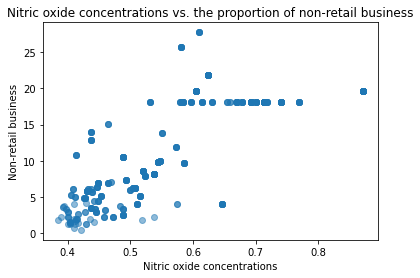

In [13]:
plt.scatter(x = boston_df['NOX'], y = boston_df['INDUS'], alpha=0.5)
plt.title('Nitric oxide concentrations vs. the proportion of non-retail business')
plt.ylabel('Non-retail business')
plt.xlabel('Nitric oxide concentrations')
plt.show()

In [20]:
X = boston_df['NOX']
y = boston_df['INDUS']
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
predictions = model.predict()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  INDUS   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           7.91e-98
Time:                        12:49:13   Log-Likelihood:                -1470.5
No. Observations:                 506   AIC:                             2945.
Df Residuals:                     504   BIC:                             2954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.9414      0.965    -14.450      0.000     -15.837     -12.046
NOX           45.2108      1.703     26.554      0.000      41.866      48.556
==============================================================================
Omnibus:                       46.050   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.622
Skew:                           0.649   Prob(JB):                     2.07e-15
Kurtosis:                       4.233   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the plot we make observation that there is correlation between Nitric oxide concentrations and the proportion of non-retail business. To test this hypothesis we use OLS regression model. Our hypothesis:
<br>H0: there is no correlation between Nitric oxide concentrations and the proportion of non-retail business 
<br>H1: there is correlation between Nitric oxide concentrations and the proportion of non-retail business<br>
From OLS regression results we obtain that p-value is 7.91e-98 is less than alpha = 0.05 we have enough prove to reject H0 in other words there is correlation between Nitric oxide concentrations and the proportion of non-retail business. As R-squared is 0,583 => correlation is very strong.

<h3> Histogram for the pupil to teacher ratio</h3>

Text(0.5, 0, 'Pupil to teacher ratio')

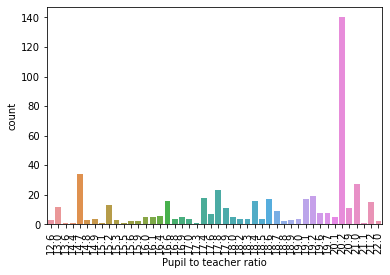

In [15]:
ax = sns.countplot(x = 'PTRATIO', data = boston_df)
ax.tick_params(axis='x', rotation=90)
plt.xlabel('Pupil to teacher ratio')

Histogram, that shows pupil to teacher ratio in Boston. We obtain several small peaks and 1 big peak.

<h2> Answering questions of the project </h2>

<h3> Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples) </h3>

<b>Hypotheses to test</b>, alpha = 0.05<br>
H0 = means of median value of houses bounded by the Charles river and not bounded by the Charles river are the same <br>
H1 (alternative) = means of median value of houses bounded by the Charles river and not bounded by the Charles river are different

In [16]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'])

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

As p-value is 7.39e-05 is less than alpha = 0.05 we have enough prove to reject H0 (null-hypothesis) and assume that there is statistically significant difference.

<h3> Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA) </h3>

<b>Hypotheses to test</b>, alpha - 0.05<br>
H0 = means of median value of houses occupied by group '35 years and younger', 'between 35 and 70 years' and '70 years and older' are the same <br>
H1 (alternative) = means of median values of groups above are statistically different

In [17]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


As p-value is 1.71e-15 is less than alpha = 0.05 we have enough prove to reject null-hypothesis and state that means of Median values of houses (MEDV) are different at least for 2 age groups from 3 following groups:'35 years and younger', 'between 35 and 70 years', '70 years and older'.

<h3> Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation) </h3>

<b>Hypotheses to test</b>, alpha = 0.05<br>
H0 = there is <b>no</b> relation between Nitric oxide concentrations and proportion of non-retail business acres per town<br>
H1 (alternative) = there <b>is</b> relation between Nitric oxide concentrations and proportion of non-retail business acres per town

In [18]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

As p-value is 7.91e-98 is less than alpha = 0.05 we have enough prove to reject null-hypothesis and state that there is relation between Nitric oxide concentrations and proportion of non-retail business acres per town

<h3> What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis) </h3>

<b>Hypotheses to test</b>, alpha = 0.05<br>
H0 = there is <b>no</b> impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes<br>
H1 (alternative) = there <b>is</b> impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

In [19]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
predictions = model.predict()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           1.21e-08
Time:                        12:46:27   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As p-value is 1.21e-08 is less than alpha = 0.05 we have enough prove to reject null-hypothesis and state that there is impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes. As R-squared is 0.062 and distance coefficient is 1.09 we conclude that R-coefficient is 0.25, which is weak positive relationship.